In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [15]:
classes = ['with_mask', 'without_mask']
dir = r'C:\Users\rssp0\Desktop\python_programes\dataset'

data = []
labels = []


In [16]:
for clas in classes:
  path = os.path.join(dir, clas)
  for img in os.listdir(path):
    img_path = os.path.join(path, img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    labels.append(clas)

C:\Users\rssp0\miniconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [17]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [18]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
len(trainX), len(trainY)

(3066, 3066)

In [19]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [20]:
mobile = keras.applications.MobileNetV2()

In [8]:
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [9]:
x = mobile.layers[-2].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [11]:
model.layers[-1]

In [12]:
for layer in model.layers[:-1]:
  layer.trainable = False

In [13]:
model.compile(Adam(0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
EPOCHS = 20
BS = 32
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Train for 95 steps, validate on 767 samples
Epoch 1/20
95/95 [==============================] - 403s 4s/step - loss: 0.4144 - accuracy: 0.8177 - val_loss: 0.5095 - val_accuracy: 0.7704
Epoch 2/20
95/95 [==============================] - 409s 4s/step - loss: 0.2299 - accuracy: 0.9216 - val_loss: 0.3848 - val_accuracy: 0.8451
Epoch 3/20
95/95 [==============================] - 788s 8s/step - loss: 0.1856 - accuracy: 0.9321 - val_loss: 0.3623 - val_accuracy: 0.8573
Epoch 4/20
95/95 [==============================] - 620s 7s/step - loss: 0.1567 - accuracy: 0.9456 - val_loss: 0.2484 - val_accuracy: 0.8954
Epoch 5/20
95/95 [==============================] - 501s 5s/step - loss: 0.1355 - accuracy: 0.9568 - val_loss: 0.3880 - val_accuracy: 0.8587
Epoch 6/20
95/95 [==============================] - 456s 5s/step - loss: 0.1331 - accuracy: 0.9575 - val_loss: 0.3054 - val_accuracy: 0.8818
Epoch 7/20
95/95 [==============================] - 490s 5s/step - loss: 0.1249 - accuracy: 0.9542 - val_loss:

In [15]:
model.save('1.h5')

In [3]:
new = load_model('1.h5')

In [5]:
new.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [7]:
for layer in new.layers:
  layer.trainable = True

In [9]:
new.compile(Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
EPOCHS = 10
BS = 32
H = new.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Epoch 1/10
95/95 [==============================] - 857s 9s/step - loss: 0.0559 - accuracy: 0.9809 - val_loss: 0.7926 - val_accuracy: 0.8501
Epoch 2/10
95/95 [==============================] - 851s 9s/step - loss: 0.0227 - accuracy: 0.9914 - val_loss: 0.7277 - val_accuracy: 0.8801
Epoch 3/10
95/95 [==============================] - 852s 9s/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.3799 - val_accuracy: 0.9140
Epoch 4/10
95/95 [==============================] - 863s 9s/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.3025 - val_accuracy: 0.9348
Epoch 5/10
95/95 [==============================] - 566s 6s/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 0.0306 - val_accuracy: 0.9857
Epoch 6/10
95/95 [==============================] - 539s 6s/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.1260 - val_accuracy: 0.9648
Epoch 7/10
95/95 [==============================] - 538s 6s/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 0.0336 - val_accuracy: 0.9870
Epoch 8/10
95

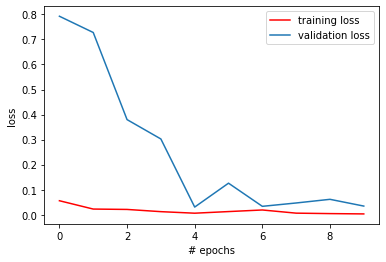

In [24]:
from matplotlib import pyplot as plt

plt.plot(H.history['loss'],'r',label='training loss')
plt.plot(H.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

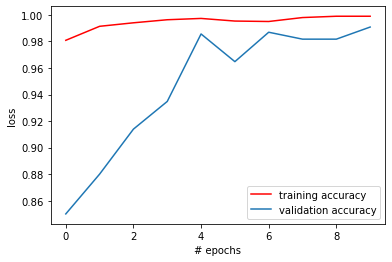

In [25]:
plt.plot(H.history['accuracy'],'r',label='training accuracy')
plt.plot(H.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
new.save('2.h5')

In [68]:
import cv2

def prepare(img_path):
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)
    image = preprocess_input(image)
    return image.reshape(-1, 224, 224, 3)


In [70]:
new = load_model('2.h5')

In [71]:
pred = new.predict([prepare('mask.jpg')])

In [72]:
pred

array([[9.9999821e-01, 1.8372863e-06]], dtype=float32)

In [109]:
label=np.max(pred,axis=1)[0]*100

In [110]:
label

99.99982118606567

In [91]:
p = new.predict([prepare('without_mask.jpg')])

In [92]:
p

array([[4.6834347e-04, 9.9953163e-01]], dtype=float32)

In [97]:
label=np.argmax(p,axis=1)[0]

In [98]:
label

1

In [104]:
def predict(image):
    image = img_to_array(image)
    image = preprocess_input(image)
    image = image.reshape(-1, 224, 224, 3)
    return new.predict(image)
    
    

In [105]:
image = load_img('mask.jpg', target_size=(224,224))

In [106]:
predict(image)

array([[9.9999821e-01, 1.8372863e-06]], dtype=float32)